#21.1 Numerical Integration Problem Statement

Given a function $f(x)$, we want to approximate the integral of $f(x)$ over the total interval, $[a,b]$. The following figure illustrates this area. To accomplish this goal, we assume that the interval has been discretized into a numeral grid, $x$, consisting of $n+1$ points with spacing, $h = \frac{b - a}{n}$. Here, we denote each point in $x$ by $x_i$, where $x_0=a$ and $x_n=b$.

Note: There are $n+1$ grid points because the count starts at $x_0$. We also assume we have a function, $f(x)$, that can be computed for any of the grid points, or that we have been given the function implicitly as $f(x_i)$. The interval $[x_i, x_{i+1}]$ is referred to as a subinterval.


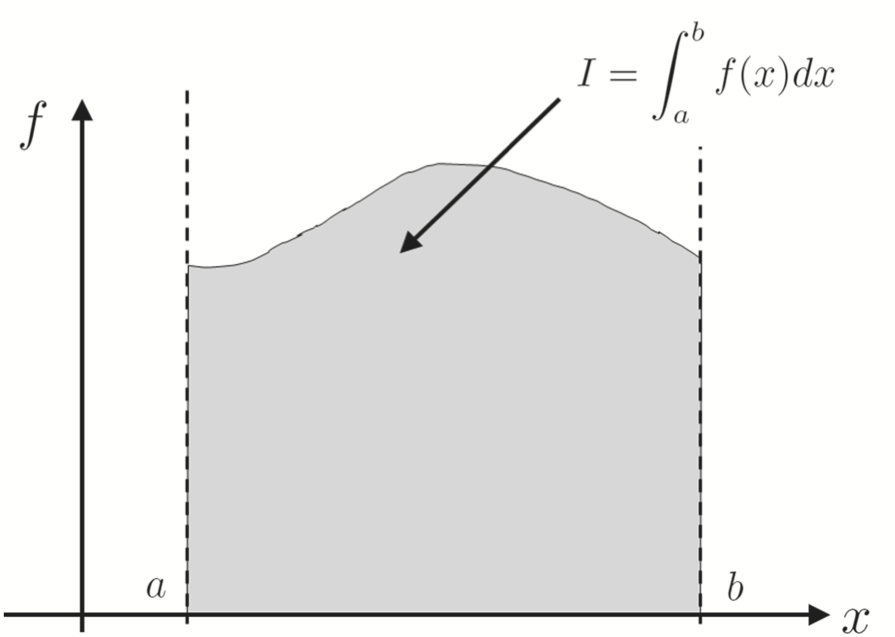


The following sections give some of the most common methods of approximating $\int_a^b f(x) dx$. Each method approximates the area under $f(x)$ for each subinterval by a shape for which it is easy to compute the exact area, and then sums the area contributions of every subinterval.

#21.2 Riemanns Integral

The simplest method for approximating integrals is by summing the area of rectangles that are defined for each subinterval. The width of the rectangle is $x_{i+1}−x_i=h$, and the height is defined by a function value $f(x)$ for some x in the subinterval. An obvious choice for the height is the function value at the left endpoint, $x_i$, or the right endpoint, $x_{i+1}$, because these values can be used even if the function itself is not known. This method gives the Riemann Integral approximation, which is

$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),$

or

$\int_a^b f(x) dx \approx \sum_{i = 1}^{n} hf(x_i),$

depending on whether the left or right endpoint is chosen.

Solving each integral separately results in the approximation:

$\int_{x_i}^{x_{i+1}} f(x) dx = hf(x_i) + O(h^2)$.

The Riemann integral approximation over a single interval is $O(h^2)$.  The overall accuracy is $O(h)$.

The Midpoint Rule takes the rectangle height of the rectangle at each subinterval to be the function value at the midpoint between $x_i$ and $x_{i+1}$, which for compactness we denote by $y_i = \frac{x_{i+1} + x_i}{2}$. The Midpoint Rule says

$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i).$

Utilizing these facts reduces the expression for the integral of $f(x)$ to

$\int_{x_i}^{x_{i+1}} f(x) dx= hf(y_i) + O(h^3).$

Since $hf(y_i)$ is the approximation of the integral over the subinterval, the Midpoint Rule is $O(h^3)$ for one subinterval, and using similar arguments as for the Riemann Integral, is $O(h^2)$ over the whole interval.


**Example:**

Use the left Riemann Integral, right Riemann Integral, and Midpoint Rule to approximate $f(x)= \frac{1}{1+x^2}$, over the interval $[0,5]$ with a partition of size $N=10$.



In [2]:
import numpy as np

In [5]:
f = lambda x : 1/(1+x**2)
a = 0 
b = 5
N = 10

h = (b-a)/N
x_left = np.linspace(a,b-h,N)
x_midpoint = np.linspace(h/2,b - h/2,N)
x_right = np.linspace(h,b,N)

print("Partition with",N,"subintervals.")
left_riemann_sum = np.sum(f(x_left) * h)
print("Left Riemann Sum:",left_riemann_sum)

midpoint_riemann_sum = np.sum(f(x_midpoint) * h)
print("Midpoint Riemann Sum:",midpoint_riemann_sum)

right_riemann_sum = np.sum(f(x_right) * h)
print("Right Riemann Sum:",right_riemann_sum)

Partition with 10 subintervals.
Left Riemann Sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


Since $\int_0^5\frac{1}{1+x^2} dx = arctan(5)$

In [12]:
I = np.arctan(5)
print(I)

1.373400766945016


In [8]:
print("Left Riemann Sum Error:",np.abs(left_riemann_sum - I))
print("Midpoint Riemann Sum Error:",np.abs(midpoint_riemann_sum - I))
print("Right Riemann Sum Error:",np.abs(right_riemann_sum - I))

Left Riemann Sum Error: 0.24008792966970915
Midpoint Riemann Sum Error: 0.00014266137164820059
Right Riemann Sum Error: 0.24068130109952168


#21.3 Trapezoid Rule

The Trapezoid Rule fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. This approximation for the integral to an arbitrary function is shown in the following figure. For each subinterval, the Trapezoid Rule computes the area of a trapezoid with corners at $(x_i,0),(x_{i+1},0),(x_i,f(x_i)), and(x_{i+1}, f(x_{i+1}))$ which is $h\frac{f(x_i) + f(x_{i+1})}{2}$. Thus, the Trapezoid Rule approximates integrals according to the expression 

$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2}.$


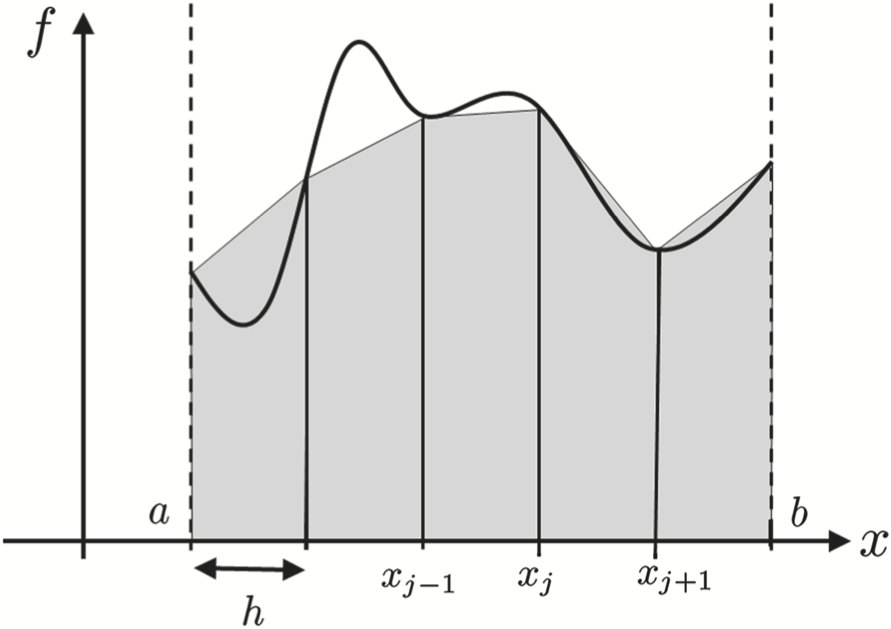

The Trapezoid Rule:

$\int_{x_i}^{x_{i+1}} f(x) dx = h \left(\frac{f(x_{i+1})+f(x_i)}{2}\right) + O(h^3).$

Since $\frac{h}{2}(f(x_{i+1}) + f(x_i))$ is the Trapezoid Rule approximation for the integral over the subinterval, it is $O(h^3)$ for a single subinterval and $O(h^2)$ over the whole interval.

**Example:**

Use the Trapezoid Rule to approximate $f(x)= \frac{1}{1+x^2}$, over the interval $[0,5]$ with a partition of size $N=10$.



In [10]:
f = lambda x : 1/(1+x**2)
a = 0 
b = 5
N = 10

x = np.linspace(a,b,N+1)
y = f(x)
y_right = y[1:] # right endpoints
y_left = y[:-1] # left endpoints
h = (b - a)/N
Trape = (h/2) * np.sum(y_right + y_left)
print('Trapezoid Approximation is', Trape)

Trapezoid approximation is 1.3731040812301096


In [11]:
print('Trapezoid Approximation Error:', np.abs(Trape - I))

Trapezoid Approximation Error: 0.00029668571490626405
